In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Types of Plots

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
url = 'http://bit.ly/2b72LNj'
df = pd.read_csv(url)

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Scatter plot

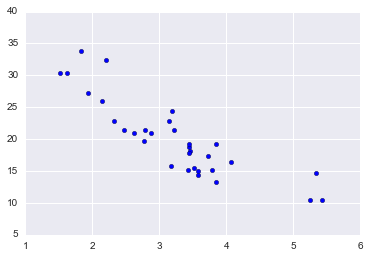

In [5]:
plt.scatter(x = 'wt', y = 'mpg', data = df)
pass

## Line plot

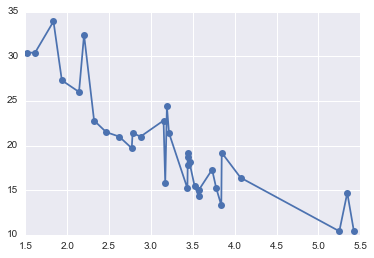

In [6]:
plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))
pass

## Fitting a regression line

### Linear regression

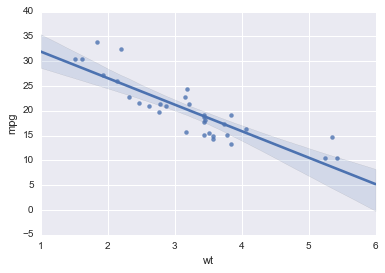

In [7]:
sns.regplot('wt', 'mpg', data = df)
pass

### Non-parametric regression

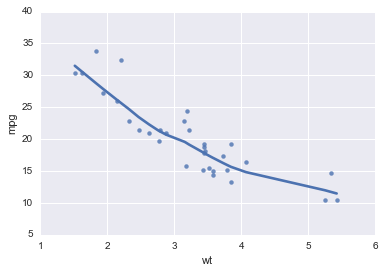

In [8]:
sns.regplot('wt', 'mpg', data = df, lowess = True,)
pass

## Swarm plot

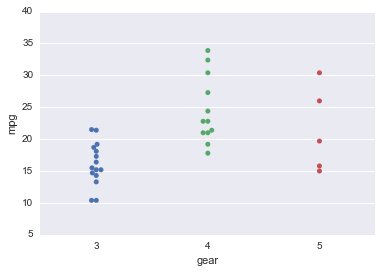

In [9]:
sns.swarmplot('gear', 'mpg', data = df)
pass

## Bar plot

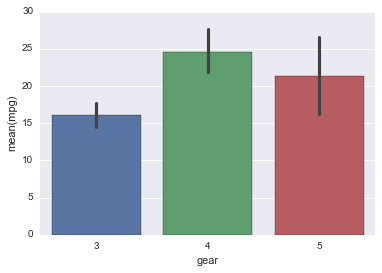

In [10]:
sns.barplot('gear', 'mpg', data = df)
pass

## Box plot

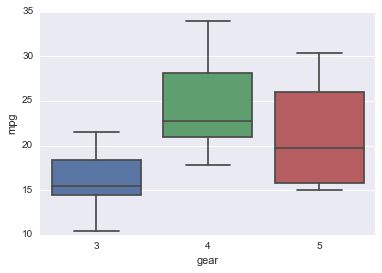

In [11]:
sns.boxplot('gear', 'mpg', data = df)
pass

## Violin plot

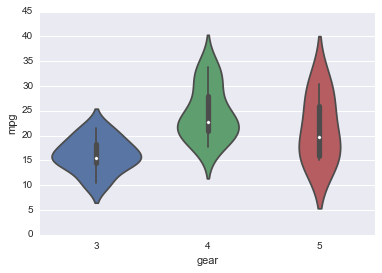

In [12]:
sns.violinplot('gear', 'mpg', data = df)
pass

## Histogram

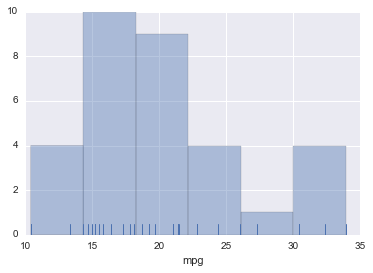

In [13]:
sns.distplot(df.mpg, kde=False, rug=True)
pass

## Density plot

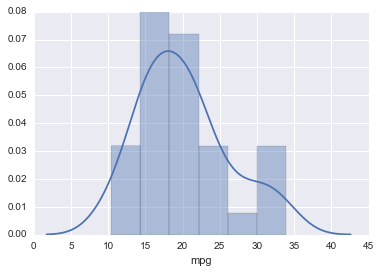

In [14]:
sns.distplot(df.mpg)
pass

## Heatmap

In [15]:
import string

In [16]:
nrows = 20
ncols = 20
row_names = range(1970, 1970 + nrows)
col_names = [string.ascii_lowercase[i:i+5] for i in range(ncols)]
values = np.random.random((nrows, ncols))

In [17]:
df = pd.DataFrame(values, index = row_names, columns = col_names)

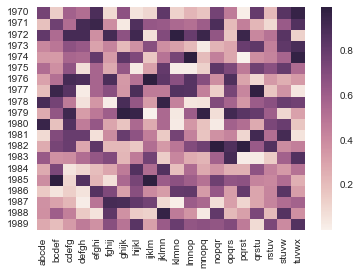

In [18]:
sns.heatmap(df)
pass

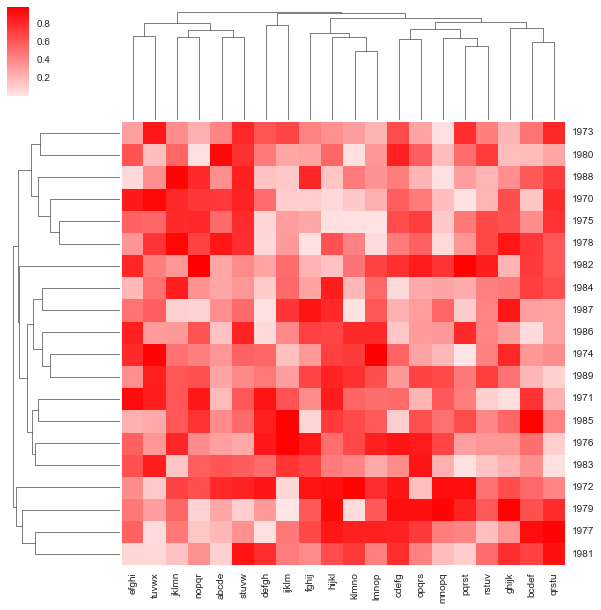

In [19]:
cmap = sns.light_palette('red', as_cmap=True)
g = sns.clustermap(df, cmap = cmap)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
pass

## Exercises

In [20]:
subjects = pd.read_excel('data/capstone1/HIV Boot Camp.xls', sheetname='Patient Information')

In [21]:
subjects.head()

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type
0,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase
1,2,44,AMIND,F,No,No,2006,YES,No,NaN
2,3,33,AMIND,F,No,No,2005,NO,No,NaN
3,4,60,AMIND,F,No,Yes,2003,NO,Yes,Integrase
4,6,47,AMIND,F,No,No,2001,YES,Yes,Other


**1**. Make a linear regression plot of `AGE` by `UNC Entry to Care Year`. Is there any trend over time that you can observe?

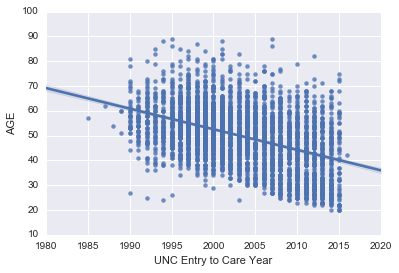

In [22]:
sns.regplot(data=subjects, y='AGE', x='UNC Entry to Care Year')
pass

**2**. Chcek the help documentaion for `sns.countplot`. Then create a barchart of the count of the number of people by SEX.

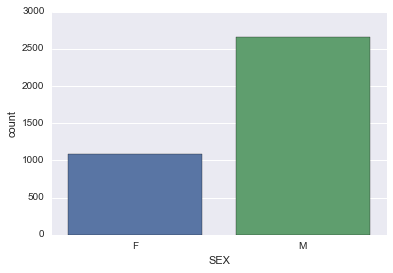

In [23]:
sns.countplot(data=subjects, x='SEX')
pass

**3**. Make a horizontal stacked barchart of the count of the number of people by RACE and color by SEX. As before, look up help on `sns.countplot` to do so.

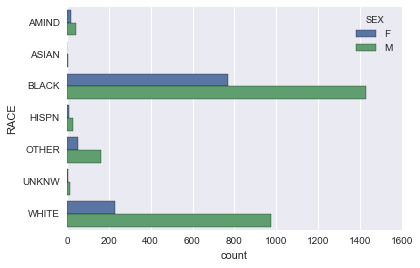

In [24]:
sns.countplot(data=subjects, y='RACE', hue='SEX')
pass

**4**. Make a barchart of the AGE of people by RACE.

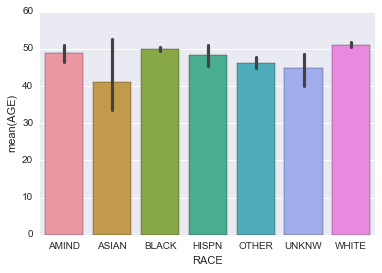

In [25]:
sns.barplot(data=subjects, x='RACE', y='AGE')
pass

**5**. Make a barchart of the AGE of people by RACE, but arrange in order of increasing average age. To do so, you need to give the order argument a list of strings containing the sequnce of RACE desired. 

**Bonus**: (More challenging) Try to get the list of strings using `pandas` rather than manually.

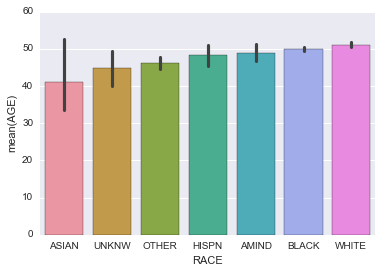

In [26]:
sns.barplot(data=subjects, x='RACE', y='AGE', 
            order=subjects.groupby('RACE').mean().sort_values('AGE').index)
pass

**6** Make a swarm plot of the AGE by RACE but only for subejcts who have MSM status equal to 'Yes'.

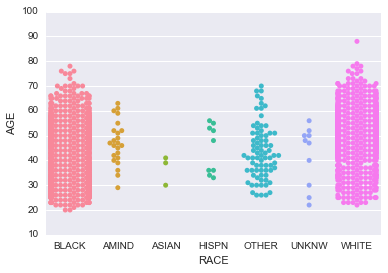

In [27]:
sns.swarmplot(data=subjects[subjects.MSM=='Yes'], x='RACE', y='AGE')
pass

**7**. (Challenging) Make a heat map of the mean AGE where the rows correspond to RACe and the columns to 'UNC Entry to Care Year'. 

Hint: Look up the `pivot_table` method of `pandas` DataFrames.

In [28]:
data = subjects.pivot_table(index='RACE', columns='UNC Entry to Care Year', values='AGE')

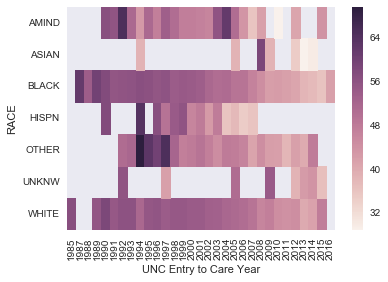

In [29]:
sns.heatmap(data)
pass